# **IMPORTING LIBRARIES**

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **GETTING THE PATHS THROUGH CSV**

In [18]:
import os
import pandas as pd

# Define the path to your dataset
dataset_path = r"/kaggle/input/15000dataset/15000 - Dataset/15000 - Dataset"

# List to store image information
image_data = []

# Loop through each class folder and get the paths of images
for class_label in ["Atelectasis", "Cardiomegaly", "Effusion", "No Finding"]:
    class_folder = os.path.join(dataset_path, class_label)
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        image_data.append({"Class": class_label, "Image Path": image_path})

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

# Print the DataFrame
print(df)

            Class                                         Image Path
0     Atelectasis  /kaggle/input/15000dataset/15000 - Dataset/150...
1     Atelectasis  /kaggle/input/15000dataset/15000 - Dataset/150...
2     Atelectasis  /kaggle/input/15000dataset/15000 - Dataset/150...
3     Atelectasis  /kaggle/input/15000dataset/15000 - Dataset/150...
4     Atelectasis  /kaggle/input/15000dataset/15000 - Dataset/150...
...           ...                                                ...
7495   No Finding  /kaggle/input/15000dataset/15000 - Dataset/150...
7496   No Finding  /kaggle/input/15000dataset/15000 - Dataset/150...
7497   No Finding  /kaggle/input/15000dataset/15000 - Dataset/150...
7498   No Finding  /kaggle/input/15000dataset/15000 - Dataset/150...
7499   No Finding  /kaggle/input/15000dataset/15000 - Dataset/150...

[7500 rows x 2 columns]


# **PRINTING and COUNTING CLass INSTANCES**

In [19]:
import os
import pandas as pd
import numpy as np
from itertools import chain

# Define the path to your dataset
dataset_path = r"/kaggle/input/15000dataset/15000 - Dataset/15000 - Dataset"

# List to store image information
image_data = []

# Loop through each class folder and get the paths of images
for class_label in ["Atelectasis", "Cardiomegaly", "Effusion", "No Finding"]:
    class_folder = os.path.join(dataset_path, class_label)
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        image_data.append({"Finding Labels": class_label, "Image Path": image_path})

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

# Map the 'Finding Labels'
df['Finding Labels'] = df['Finding Labels'].map(lambda x: x.replace('No Finding', 'No Finding'))

# Get all unique labels
all_labels = np.unique(list(chain(*df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x) > 0]

# Create binary columns for each label
for c_label in all_labels:
    if len(c_label) > 1:  # Leave out empty labels
        df[c_label] = df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)

# Filter out labels with fewer than MIN_CASES occurrences
MIN_CASES = 1000
clean_labels = [c_label for c_label in all_labels if df[c_label].sum() > MIN_CASES]

# Display the count of remaining clean labels
print('Clean Labels ({}):'.format(len(clean_labels)), 
      [(c_label, int(df[c_label].sum())) for c_label in clean_labels])

Clean Labels (4): [('Atelectasis', 1875), ('Cardiomegaly', 1875), ('Effusion', 1875), ('No Finding', 1875)]


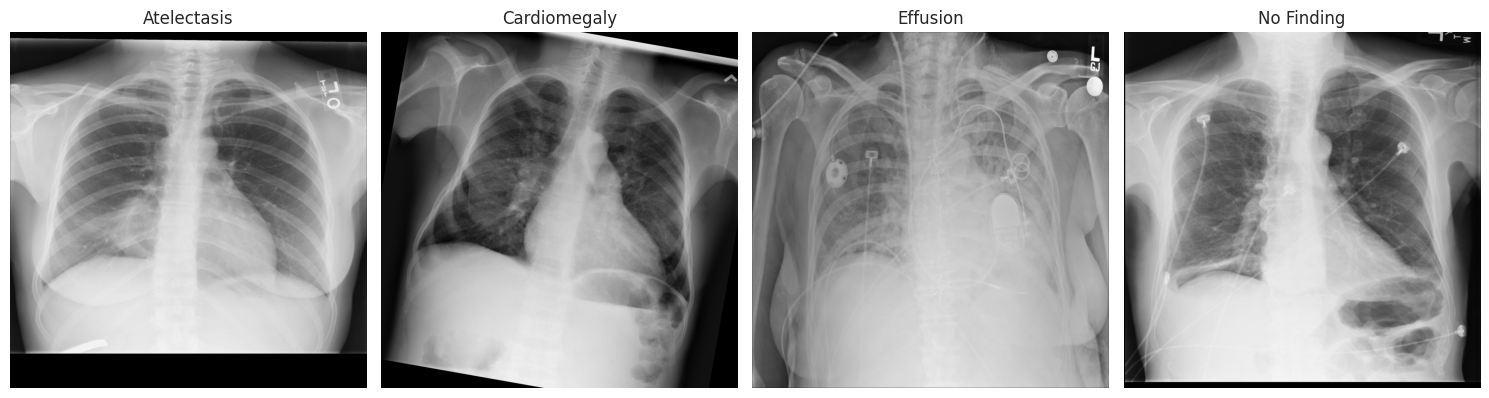

In [20]:
import matplotlib.pyplot as plt
from PIL import Image

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Loop through each clean label and plot the corresponding image
for idx, class_label in enumerate(clean_labels):
    single_instance = df[df[class_label] == 1].sample(n=1)  # Get a random instance for each class
    image_path = single_instance['Image Path'].values[0]
    
    # Load the image
    image = Image.open(image_path)
    
    # Plot the image
    plt.subplot(2, 4, idx + 1)  # Adjust the grid size based on the number of classes
    plt.imshow(image, cmap='gray')  # Use cmap='gray' for grayscale images
    plt.title(class_label)
    plt.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

# **PLOTTING THE INSTANCES**

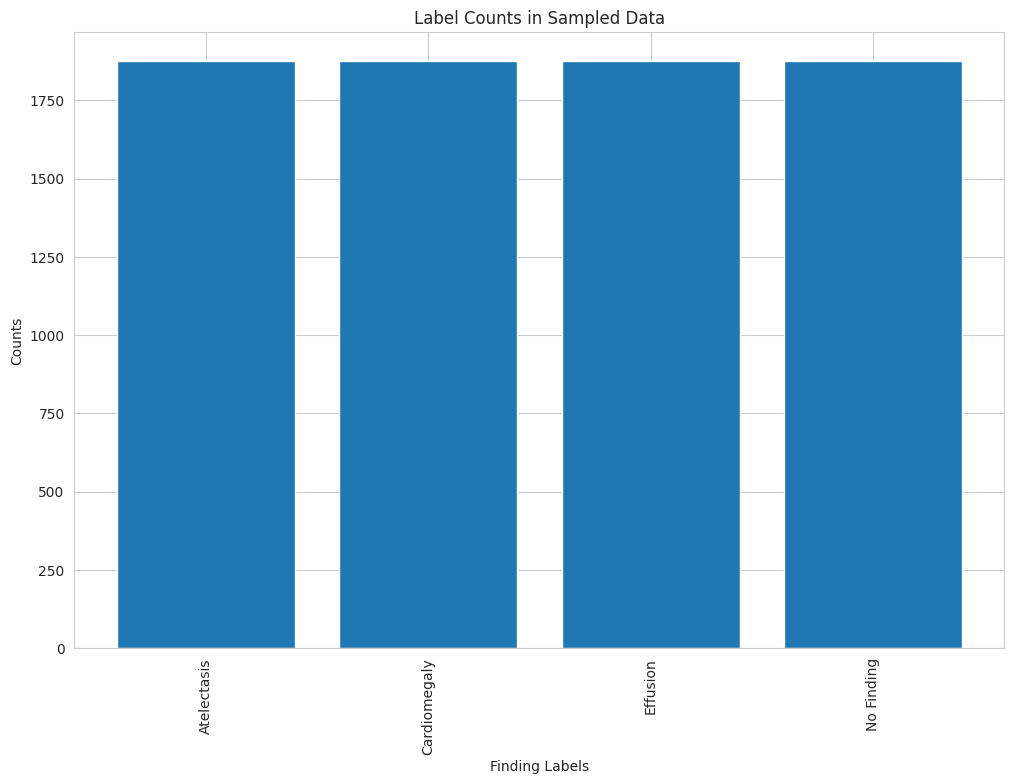

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming `df` is the DataFrame you are using
label_counts = df['Finding Labels'].value_counts()[:15]

# Create a bar plot for the label counts
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
ax1.set_xticklabels(label_counts.index, rotation=90)
ax1.set_title('Label Counts in Sampled Data')
ax1.set_xlabel('Finding Labels')
ax1.set_ylabel('Counts')
plt.show()

# **REPRESENTING LABELS IN DATAFRAM AS DISEASE_VEC**

In [22]:
# Assuming `all_labels` is a list of labels you're interested in
df['disease_vec'] = df[all_labels].values.tolist()

In [23]:
print(df)

     Finding Labels                                         Image Path  \
0       Atelectasis  /kaggle/input/15000dataset/15000 - Dataset/150...   
1       Atelectasis  /kaggle/input/15000dataset/15000 - Dataset/150...   
2       Atelectasis  /kaggle/input/15000dataset/15000 - Dataset/150...   
3       Atelectasis  /kaggle/input/15000dataset/15000 - Dataset/150...   
4       Atelectasis  /kaggle/input/15000dataset/15000 - Dataset/150...   
...             ...                                                ...   
7495     No Finding  /kaggle/input/15000dataset/15000 - Dataset/150...   
7496     No Finding  /kaggle/input/15000dataset/15000 - Dataset/150...   
7497     No Finding  /kaggle/input/15000dataset/15000 - Dataset/150...   
7498     No Finding  /kaggle/input/15000dataset/15000 - Dataset/150...   
7499     No Finding  /kaggle/input/15000dataset/15000 - Dataset/150...   

      Atelectasis  Cardiomegaly  Effusion  No Finding           disease_vec  
0             1.0           0.0  

# **DATA SPLITTING**

In [24]:
from sklearn.model_selection import train_test_split

# Ensure 'df' is defined and has a column named 'Finding Labels'
# Split the DataFrame into training and validation sets
train_df, valid_df = train_test_split(
    df, 
    test_size=0.10,  # 10% for validation
    random_state=2018,
    stratify=df['Finding Labels']  # Use the Finding Labels column for stratification
)

print('Training samples:', train_df.shape[0], 'Validation samples:', valid_df.shape[0])

Training samples: 6750 Validation samples: 750


#  **DATASET AUGMENTATION**

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size
IMG_SIZE = (128, 128)

# Create an ImageDataGenerator for preprocessing
core_idg = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    samplewise_center=True,
    samplewise_std_normalization=True,
    horizontal_flip=True,  # Allow horizontal flipping
    vertical_flip=False,    # Do not allow vertical flipping
    height_shift_range=0.05,  # Randomly shift images vertically
    width_shift_range=0.1,     # Randomly shift images horizontally
    rotation_range=5,           # Rotate images slightly
    shear_range=0.1,            # Apply shear transformation
    fill_mode='reflect',        # Fill mode for new pixels
    zoom_range=0.15             # Random zoom
)

In [26]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    # Ensure the path column is absolute paths
    in_df[path_col] = in_df[path_col].apply(lambda x: os.path.abspath(x))

    print('## Ignore next message from keras; values are replaced anyway')
    
    # Create a generator that reads images directly from the DataFrame
    df_gen = img_data_gen.flow(
        x=in_df[path_col].values.tolist(),  # Use image paths as input
        y=np.array(in_df[y_col].values),    # Labels as output
        **dflow_args
    )
    
    # Update generator attributes
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]

    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    
    return df_gen

# **DATALOADERS FOR TRAIN,VALIDATE AND TEST**

In [29]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing import image

# Custom DataFrameIterator to handle the DataFrame input
class DataFrameIterator(Sequence):
    def __init__(self, dataframe, image_data_generator, directory='',
                 x_col='filename', y_col='class', target_size=(256, 256),
                 color_mode='rgb', batch_size=16, shuffle=True, seed=None):
        self.df = dataframe
        self.image_data_generator = image_data_generator
        self.directory = directory
        self.x_col = x_col
        self.y_col = y_col
        self.target_size = target_size
        self.color_mode = color_mode
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.seed = seed
        self.indexes = np.arange(len(self.df))
        self.on_epoch_end()
        self.current_index = 0  # To keep track of current index for __next__

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_df = self.df.iloc[indexes]
#         print(batch_df)
        return self.__data_generation(batch_df)

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle:
            np.random.shuffle(self.indexes)
        self.current_index = 0  # Reset current index on epoch end

    def __data_generation(self, batch_df):
        # Adjust the batch size for grayscale images
        batch_x = np.zeros((len(batch_df), *self.target_size, 1 if self.color_mode == 'grayscale' else 3))
        batch_y = np.zeros((len(batch_df), len(batch_df[self.y_col].iloc[0])))

        for i, (_, row) in enumerate(batch_df.iterrows()):
            img_path = os.path.join(self.directory, row[self.x_col])
            img = image.load_img(img_path, target_size=self.target_size, color_mode=self.color_mode)
            img_array = image.img_to_array(img)
            batch_x[i] = img_array

            # Assign the label vector
            batch_y[i] = row[self.y_col]

        batch_x = self.image_data_generator.standardize(batch_x)  # Standardize the images
        return batch_x, batch_y

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_index >= len(self):
            self.on_epoch_end()
            raise StopIteration
        else:
            result = self.__getitem__(self.current_index)
            self.current_index += 1
            return result

def flow_from_dataframe(image_data_generator, dataframe, path_col, y_col,
                        target_size=(256, 256), color_mode='rgb',
                        batch_size=16, shuffle=True):
    return DataFrameIterator(dataframe, image_data_generator,
                             x_col=path_col, y_col=y_col,
                             target_size=target_size,
                             color_mode=color_mode,
                             batch_size=batch_size,
                             shuffle=shuffle)

# Assuming 'core_idg' is already defined and 'train_df' and 'valid_df' are your DataFrames
IMG_SIZE = (256, 256)

# Create the training generator
train_gen = flow_from_dataframe(core_idg, train_df,
                                path_col='Image Path',
                                y_col='disease_vec',
                                target_size=IMG_SIZE,
                                color_mode='grayscale',  # Set to grayscale
                                batch_size=16)

# Create the validation generator
valid_gen = flow_from_dataframe(core_idg, valid_df,
                                path_col='Image Path',
                                y_col='disease_vec',
                                target_size=IMG_SIZE,
                                color_mode='grayscale',  # Set to grayscale
                                batch_size=16)

# Check the length of valid_df
num_samples = len(valid_df)

# Ensure the batch size is not larger than the number of samples
batch_size = min(16, num_samples)  # Adjust based on available memory

# Create a new generator with the adjusted batch size for testing
test_gen = flow_from_dataframe(core_idg, valid_df,
                               path_col='Image Path',
                               y_col='disease_vec',
                               target_size=IMG_SIZE,
                               color_mode='grayscale',  # Set to grayscale
                               batch_size=batch_size)

# Fetch the test data
try:
    test_X, test_Y = next(iter(test_gen))
    print("Test data shape:", test_X.shape, test_Y.shape)
except IndexError as e:
    print("Error fetching test data:", e)

# Fetch some training and validation data to ensure the generators work
try:
    train_X, train_Y = next(iter(train_gen))
    print("Training data shape:", train_X.shape, train_Y.shape)

    valid_X, valid_Y = next(iter(valid_gen))
    print("Validation data shape:", valid_X.shape, valid_Y.shape)
except IndexError as e:
    print("Error fetching train/validation data:", e)

Test data shape: (16, 256, 256, 1) (16, 4)
Training data shape: (16, 256, 256, 1) (16, 4)
Validation data shape: (16, 256, 256, 1) (16, 4)


# **SAMPLE AFTER DATA AUGMENTATION**

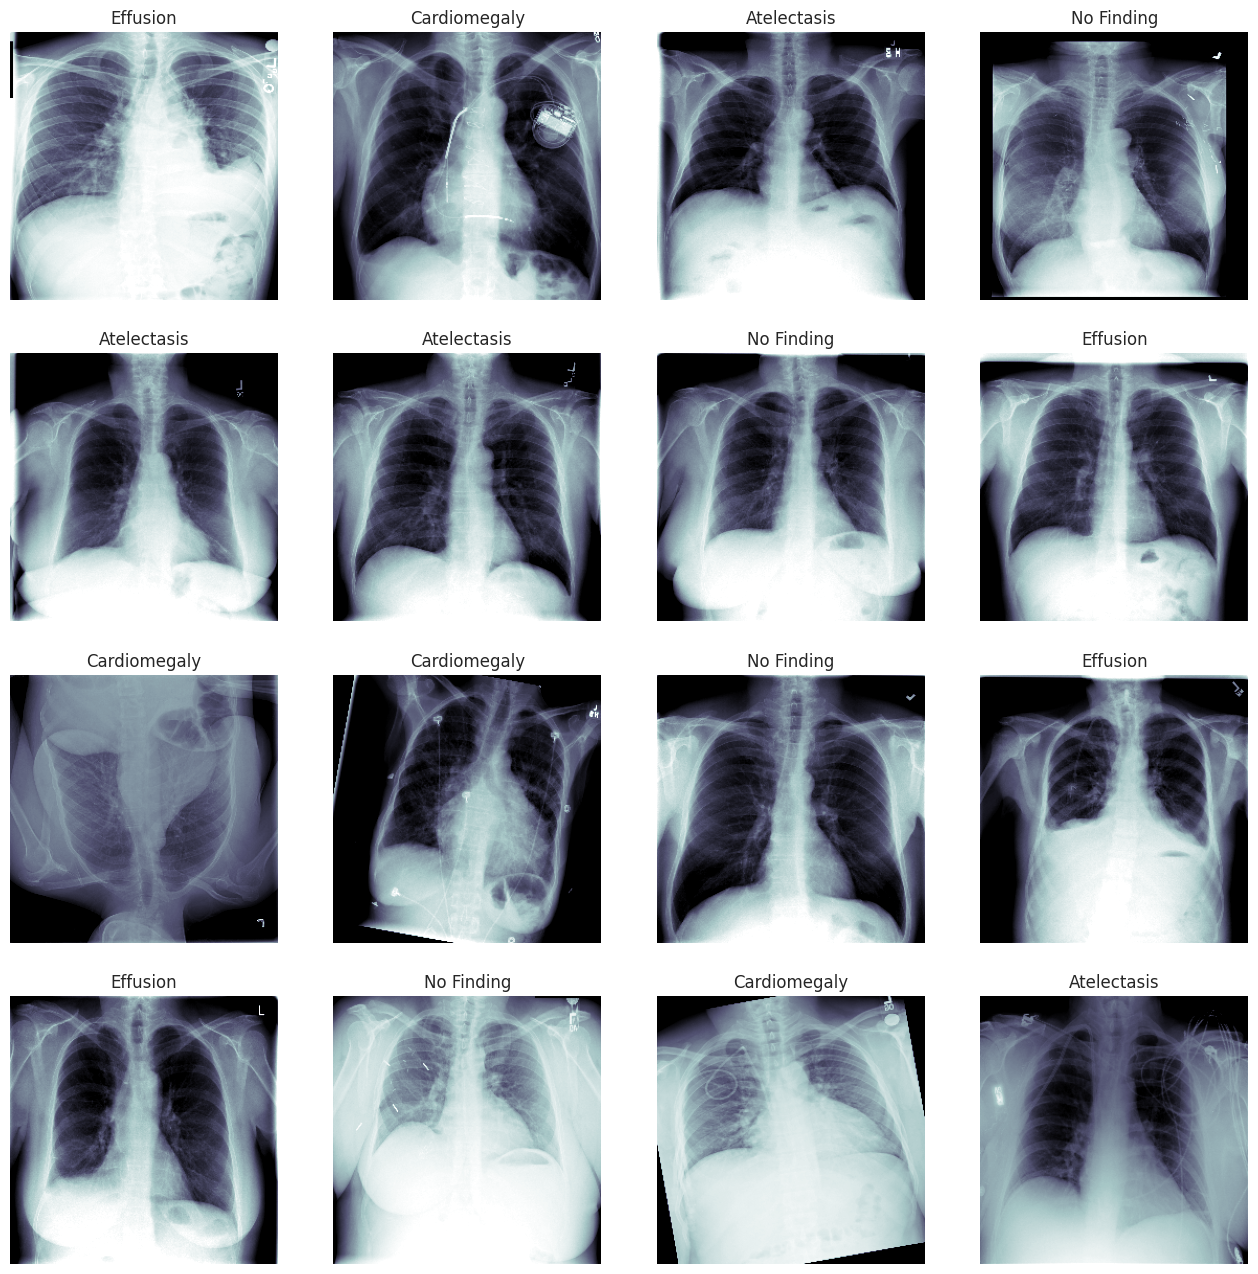

In [30]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

# **MODEL DEFINATION AND ITS FUNCTIONS**

In [60]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, Input, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing import image
import os
import pandas as pd
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau

# Custom DataFrameIterator to handle the DataFrame input
class DataFrameIterator(Sequence):
    def __init__(self, dataframe, image_data_generator, directory='',
                 x_col='filename', y_col='class', target_size=(256, 256),
                 color_mode='rgb', batch_size=16, shuffle=True, seed=None):
        self.df = dataframe
        self.image_data_generator = image_data_generator
        self.directory = directory
        self.x_col = x_col
        self.y_col = y_col
        self.target_size = target_size
        self.color_mode = color_mode
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.seed = seed
        self.indexes = np.arange(len(self.df))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_df = self.df.iloc[indexes]
        return self.__data_generation(batch_df)

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_df):
        batch_x = np.zeros((len(batch_df), *self.target_size, 1 if self.color_mode == 'grayscale' else 3))
        batch_y = np.zeros((len(batch_df), len(batch_df[self.y_col].iloc[0])))

        for i, (_, row) in enumerate(batch_df.iterrows()):
            img_path = os.path.join(self.directory, row[self.x_col])
            img = image.load_img(img_path, target_size=self.target_size, color_mode=self.color_mode)
            img_array = image.img_to_array(img)
            batch_x[i] = img_array
            batch_y[i] = row[self.y_col]

        batch_x = self.image_data_generator.standardize(batch_x)
        return batch_x, batch_y

def flow_from_dataframe(image_data_generator, dataframe, path_col, y_col, target_size=(256, 256), color_mode='rgb', batch_size=32, shuffle=True):
    return DataFrameIterator(dataframe, image_data_generator,
                             x_col=path_col, y_col=y_col,
                             target_size=target_size,
                             color_mode=color_mode,
                             batch_size=batch_size,
                             shuffle=shuffle)

# Define the custom CSV logging callback
class CSVLoggerCallback(Callback):
    def __init__(self, filename='result.csv'):
        super().__init__()
        self.filename = filename
        self.epoch_data = []

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = epoch + 1  # Epochs are 0-indexed internally
        self.epoch_data.append(logs)
        df = pd.DataFrame(self.epoch_data)
        df.to_csv(self.filename, index=False)

# Assuming 'core_idg' is already defined and 'train_df' and 'valid_df' are your DataFrames
IMG_SIZE = (256, 256)

# Create the generators
train_gen = flow_from_dataframe(core_idg, train_df,
                                path_col='Image Path',
                                y_col='disease_vec',
                                target_size=IMG_SIZE,
                                color_mode='grayscale',
                                batch_size=16)

valid_gen = flow_from_dataframe(core_idg, valid_df,
                                path_col='Image Path',
                                y_col='disease_vec',
                                target_size=IMG_SIZE,
                                color_mode='grayscale',
                                batch_size=16)

# Function to create the model using the Functional API
def create_functional_model():
    base_model = MobileNet(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model layers

    inputs = Input(shape=(256, 256, 1))
    x = Conv2D(3, (3, 3), padding='same')(inputs)  # Convert grayscale to RGB
    x = base_model(x, training=False)  # Feature extraction
    x = GlobalAveragePooling2D()(x)  # Pooling
    x = Dropout(0.5)(x)  # Dropout for regularization
    x = Dense(512, activation='relu')(x)  # Dense layer for classification
    x = BatchNormalization()(x)  # Batch Normalization
    x = Dropout(0.5)(x)  # Additional dropout
    outputs = Dense(len(all_labels), activation='sigmoid')(x)  # Output layer

    model = Model(inputs, outputs)
    return model

# Initialize variables
best_val_acc = 0
best_history = None
model_save_path = "MobileNet.keras"

# Create the model
multi_disease_model = create_functional_model()

# Unfreeze the last few layers of the base model for fine-tuning
for layer in multi_disease_model.layers[-10:]:
    if not isinstance(layer, BatchNormalization):
        layer.trainable = True

# Update the optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model with the new optimizer
multi_disease_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

# Print the model summary
multi_disease_model.summary()

# Create the CSVLoggerCallback
csv_logger = CSVLoggerCallback(filename='result.csv')

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,
    patience=5, 
    min_lr=0.00001
)

# Train the model using the fit method
history = multi_disease_model.fit(
    train_gen,
    steps_per_epoch=100,
    validation_data=valid_gen,
    validation_steps=100,
    epochs=50,
    callbacks=[csv_logger, reduce_lr]  # Add the learning rate scheduler here
)

# Check if the validation accuracy improved
max_val_acc = max(history.history['val_binary_accuracy'])
if max_val_acc > best_val_acc:
    best_val_acc = max_val_acc
    best_history = history
    multi_disease_model.save(model_save_path)
    print(f"New best model saved with validation accuracy: {best_val_acc}")

# At the end of training, best_history will contain the history of the best run
print(f"Best validation accuracy: {best_val_acc}")

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 3)    │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 8, 8, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,757,794 (14.33 MB)

 Trainable params: 3,734,882 (14.25 MB)

 Non-trainable params: 22,912 (89.50 KB)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 322ms/step - binary_accuracy: 0.5289 - loss: 0.9880 - val_binary_accuracy: 0.4317 - val_loss: 1.1888 - epoch: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - binary_accuracy: 0.6157 - loss: 0.7924 - val_binary_accuracy: 0.5632 - val_loss: 0.7984 - epoch: 2.0000 - learning_rate: 1.0000e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - binary_accuracy: 0.6665 - loss: 0.7035 - val_binary_accuracy: 0.7303 - val_loss: 0.5300 - epoch: 3.0000 - learning_rate: 1.0000e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 294ms/step - binary_accuracy: 0.7009 - loss: 0.6618 - val_binary_accuracy: 0.7480 - val_loss: 0.4868 - epoch: 4.0000 - learning_rate: 1.0000e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - binary_accuracy: 0.6955 - loss: 0.6400 - val_binary_accuracy: 0.7840 - val_loss: 0.4340 - epoch: 5.0000 - learning_rate: 1.0000e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 306ms/step 

#  **PLOTTING THE TRAIN AND VALIDATION LOSS**

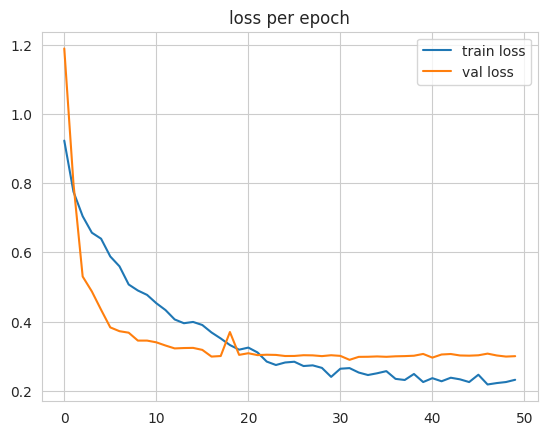

In [61]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('loss per epoch')
plt.show()

# **TESTING**

In [62]:
import os
import pandas as pd
import numpy as np
from itertools import chain
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to your dataset
dataset_path = r"/kaggle/input/15000dataset/3000-Test Data"

# List to store image information
image_data = []

# Loop through each class folder and get the paths of images
for class_label in ["Atelectasis", "Cardiomegaly", "Effusion", "No Finding"]:
    class_folder = os.path.join(dataset_path, class_label)
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        image_data.append({"Finding Labels": class_label, "Image Path": image_path})

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

# Map the 'Finding Labels'
df['Finding Labels'] = df['Finding Labels'].map(lambda x: x.replace('No Finding', 'No Finding'))

# Get all unique labels
all_labels = np.unique(list(chain(*df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x) > 0]

# Create binary columns for each label
for c_label in all_labels:
    if len(c_label) > 1:  # Leave out empty labels
        df[c_label] = df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)

# Filter out labels with fewer than MIN_CASES occurrences
MIN_CASES = 200
clean_labels = [c_label for c_label in all_labels if df[c_label].sum() > MIN_CASES]

# Display the count of remaining clean labels
print('Clean Labels ({}):'.format(len(clean_labels)), 
      [(c_label, int(df[c_label].sum())) for c_label in clean_labels])

# # Define test_X and test_Y
# image_size = (256, 256)  # Adjust according to your model's expected input size

# # Load and preprocess images for test_X
# test_X = []
# for image_path in df['Image Path']:
#     img = load_img(image_path, target_size=image_size, color_mode='grayscale')  # Adjust color_mode if needed
#     img_array = img_to_array(img) / 256.0  # Normalize the image
#     test_X.append(img_array)

# test_X = np.array(test_X)  # Convert to numpy array

# # Create test_Y based on clean labels
# test_Y = df[clean_labels].values

# Evaluate the model
# print('Test binary accuracy = ', multi_disease_model.evaluate(test_X, test_Y, verbose=0)[1])

Clean Labels (4): [('Atelectasis', 375), ('Cardiomegaly', 375), ('Effusion', 375), ('No Finding', 375)]


In [63]:
df['disease_vec'] = df[clean_labels].values.tolist()

In [64]:
df

,Finding Labels,Image Path,Atelectasis,Cardiomegaly,Effusion,No Finding,disease_vec
0,Atelectasis,/kaggle/input/15000dataset/3000-Test Data/Atel...,1.0,0.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0]"
1,Atelectasis,/kaggle/input/15000dataset/3000-Test Data/Atel...,1.0,0.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0]"
2,Atelectasis,/kaggle/input/15000dataset/3000-Test Data/Atel...,1.0,0.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0]"
3,Atelectasis,/kaggle/input/15000dataset/3000-Test Data/Atel...,1.0,0.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0]"
4,Atelectasis,/kaggle/input/15000dataset/3000-Test Data/Atel...,1.0,0.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...
1495,No Finding,/kaggle/input/15000dataset/3000-Test Data/No F...,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0]"
1496,No Finding,/kaggle/input/15000dataset/3000-Test Data/No F...,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0]"
1497,No Finding,/kaggle/input/15000dataset/3000-Test Data/No F...,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0]"
1498,No Finding,/kaggle/input/15000dataset/3000-Test Data/No F...,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0]"


In [65]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing import image

# Custom DataFrameIterator to handle the DataFrame input
class DataFrameIterator(Sequence):
    def __init__(self, dataframe, image_data_generator, directory='',
                 x_col='filename', y_col='class', target_size=(256, 256),
                 color_mode='rgb', batch_size=16, shuffle=True, seed=None):
        self.df = dataframe
        self.image_data_generator = image_data_generator
        self.directory = directory
        self.x_col = x_col
        self.y_col = y_col
        self.target_size = target_size
        self.color_mode = color_mode
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.seed = seed
        self.indexes = np.arange(len(self.df))
        self.on_epoch_end()
        self.current_index = 0  # To keep track of current index for __next__

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_df = self.df.iloc[indexes]
        print(batch_df)
        return self.__data_generation(batch_df)

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle:
            np.random.shuffle(self.indexes)
        self.current_index = 0  # Reset current index on epoch end

    def __data_generation(self, batch_df):
        # Adjust the batch size for grayscale images
        batch_x = np.zeros((len(batch_df), *self.target_size, 1 if self.color_mode == 'grayscale' else 3))
        batch_y = np.zeros((len(batch_df), len(batch_df[self.y_col].iloc[0])))

        for i, (_, row) in enumerate(batch_df.iterrows()):
            img_path = os.path.join(self.directory, row[self.x_col])
            img = image.load_img(img_path, target_size=self.target_size, color_mode=self.color_mode)
            img_array = image.img_to_array(img)
            batch_x[i] = img_array

            # Assign the label vector
            batch_y[i] = row[self.y_col]

        batch_x = self.image_data_generator.standardize(batch_x)  # Standardize the images
        return batch_x, batch_y

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_index >= len(self):
            self.on_epoch_end()
            raise StopIteration
        else:
            result = self.__getitem__(self.current_index)
            self.current_index += 1
            return result

def flow_from_dataframe(image_data_generator, dataframe, path_col, y_col,
                        target_size=(256, 256), color_mode='rgb',
                        batch_size=16, shuffle=True):
    return DataFrameIterator(dataframe, image_data_generator,
                             x_col=path_col, y_col=y_col,
                             target_size=target_size,
                             color_mode=color_mode,
                             batch_size=batch_size,
                             shuffle=shuffle)

# Assuming 'core_idg' is already defined and 'train_df' and 'valid_df' are your DataFrames
IMG_SIZE = (256, 256)


# Check the length of valid_df
num_samples = len(df)

# Ensure the batch size is not larger than the number of samples
batch_size = min(16, num_samples)  # Adjust based on available memory

# Create a new generator with the adjusted batch size for testing
test_gen = flow_from_dataframe(core_idg, df,
                               path_col='Image Path',
                               y_col='disease_vec',
                               target_size=IMG_SIZE,
                               color_mode='grayscale',  # Set to grayscale
                               batch_size=batch_size)

# Fetch the test data
try:
    test_X, test_Y = next(iter(test_gen))
    print("Test data shape:", test_X.shape, test_Y.shape)
except IndexError as e:
    print("Error fetching test data:", e)



     Finding Labels                                         Image Path  \
1321     No Finding  /kaggle/input/15000dataset/3000-Test Data/No F...   
918        Effusion  /kaggle/input/15000dataset/3000-Test Data/Effu...   
1007       Effusion  /kaggle/input/15000dataset/3000-Test Data/Effu...   
374     Atelectasis  /kaggle/input/15000dataset/3000-Test Data/Atel...   
931        Effusion  /kaggle/input/15000dataset/3000-Test Data/Effu...   
579    Cardiomegaly  /kaggle/input/15000dataset/3000-Test Data/Card...   
886        Effusion  /kaggle/input/15000dataset/3000-Test Data/Effu...   
252     Atelectasis  /kaggle/input/15000dataset/3000-Test Data/Atel...   
1122       Effusion  /kaggle/input/15000dataset/3000-Test Data/Effu...   
1439     No Finding  /kaggle/input/15000dataset/3000-Test Data/No F...   
122     Atelectasis  /kaggle/input/15000dataset/3000-Test Data/Atel...   
219     Atelectasis  /kaggle/input/15000dataset/3000-Test Data/Atel...   
444    Cardiomegaly  /kaggle/input/150

In [66]:
print('test binary accuracy = ',multi_disease_model.evaluate(test_X,test_Y, verbose=0)[1])

test binary accuracy =  0.90625


# **PREDICTION BASED OM THE CLASSES**

In [67]:
# Assuming you have a trained model and test data
y_pred = multi_disease_model.predict(test_X)  # Replace 'model' with your model variable and 'test_X' with your test data

# Ensure y_pred is defined before using it in the loop
for c_label, p_count, t_count in zip(all_labels, 
                                     100 * np.mean(y_pred, axis=0), 
                                     100 * np.mean(test_Y, axis=0)):
    print('%s: actual: %2.2f%%, predicted: %2.2f%%' % (c_label, t_count, p_count))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Atelectasis: actual: 25.00%, predicted: 27.18%
Cardiomegaly: actual: 18.75%, predicted: 19.81%
Effusion: actual: 37.50%, predicted: 33.02%
No Finding: actual: 18.75%, predicted: 20.02%


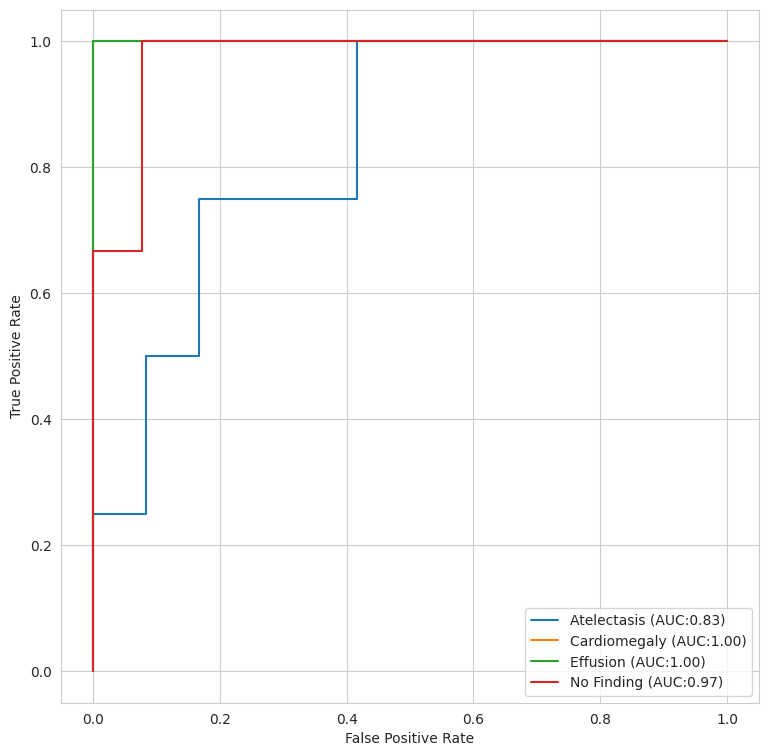

In [68]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

In [69]:
from sklearn.metrics import roc_auc_score
print('roc score = ',roc_auc_score(test_Y.astype(int), y_pred))

roc score =  0.9519230769230769


In [58]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the model
model_path = r"/kaggle/working/best_model2.h5"
model = load_model(model_path)

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(256, 256), color_mode='grayscale')
    
    # Convert the image to array
    img_array = image.img_to_array(img)
    
    # Expand dimensions to match the model input
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image array
    img_array = preprocess_input(img_array)
    
    return img_array

# Function to make a prediction
def predict_image(img_path):
    # Load and preprocess the image
    img_array = load_and_preprocess_image(img_path)
    
    # Make a prediction
    prediction = model.predict(img_array)
    
    return prediction

# Example usage
img_path = r"/kaggle/input/15000dataset/3000-Test Data/No Finding/00000963_022.png"
prediction = predict_image(img_path)
print("Prediction:", prediction)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/working/best_model2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)